# **01. Imports**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 

        # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/predict-the-success-of-bank-telemarketing/sample_submission.csv
/kaggle/input/predict-the-success-of-bank-telemarketing/train.csv
/kaggle/input/predict-the-success-of-bank-telemarketing/test.csv


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing

# Data visulization
import matplotlib.pyplot as plt 
import seaborn as sns

# using make_pipeline for creating pipelines for preprocessing
from sklearn.pipeline import make_pipeline

#  using simple imputer for missing values
from sklearn.impute import SimpleImputer

# using OneHotEncoder ,OrdinalEncoder for encoding categorical features and StandardScaler for normalising them.
from sklearn.preprocessing import OneHotEncoder ,OrdinalEncoder , MinMaxScaler, LabelEncoder

# Model selection
from sklearn.model_selection import train_test_split

# For combing multiple pipleines
from sklearn.compose import make_column_transformer

# Scoring and reports
from sklearn.metrics import f1_score, classification_report
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score

# Estimators
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier

# Metrics for Display and Analysis
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay

# Hyper-Parameter Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# **02. Loading the Dataset**

In [3]:
#loading the train dataset
train_df=pd.read_csv('/kaggle/input/predict-the-success-of-bank-telemarketing/train.csv')
#loading the test dataset
test_df=pd.read_csv('/kaggle/input/predict-the-success-of-bank-telemarketing/test.csv')

# **03. Exploratory Data Analysis**

## **3.1 Data Description**
1. Last contact date: last contact date
2. age (numeric)
3. job : type of job
4. marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
5. education (categorical: "unknown","secondary","primary","tertiary")
6. default: has credit in default? (binary: "yes","no")
7. balance: average yearly balance, in euros (numeric)
8. housing: has housing loan? (binary: "yes","no")
9. loan: has personal loan? (binary: "yes","no")
10. contact: contact communication type (categorical: "unknown","telephone","cellular")
11. duration: last contact duration, in seconds (numeric)
12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
14. previous: number of contacts performed before this campaign and for this client (numeric)
15. poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

**Output variable (desired target):**

16. target: has the client subscribed a term deposit? (binary: "yes","no")

## **3.2 Train Dataset**

In [4]:
train_df.head()

,last contact date,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,target
0,2009-04-17,26,blue-collar,married,secondary,no,647,yes,no,cellular,357,2,331,1,other,no
1,2009-10-11,52,technician,married,secondary,no,553,yes,no,telephone,160,1,-1,0,NaN,no
2,2010-11-20,44,blue-collar,married,secondary,no,1397,no,no,cellular,326,1,-1,0,NaN,no
3,2009-09-01,33,admin.,married,secondary,no,394,yes,no,telephone,104,3,-1,0,NaN,no
4,2008-01-29,31,entrepreneur,single,tertiary,no,137,no,no,cellular,445,2,-1,0,NaN,no


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39211 entries, 0 to 39210
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   last contact date  39211 non-null  object
 1   age                39211 non-null  int64 
 2   job                38982 non-null  object
 3   marital            39211 non-null  object
 4   education          37744 non-null  object
 5   default            39211 non-null  object
 6   balance            39211 non-null  int64 
 7   housing            39211 non-null  object
 8   loan               39211 non-null  object
 9   contact            28875 non-null  object
 10  duration           39211 non-null  int64 
 11  campaign           39211 non-null  int64 
 12  pdays              39211 non-null  int64 
 13  previous           39211 non-null  int64 
 14  poutcome           9760 non-null   object
 15  target             39211 non-null  object
dtypes: int64(6), object(10)
memory usage: 4.

In [6]:
#For Numeric columns
train_df.describe()

,age,balance,duration,campaign,pdays,previous
count,39211.000000,39211.000000,39211.000000,39211.000000,39211.000000,39211.000000
mean,42.120247,5441.781719,439.062789,5.108770,72.256051,11.826171
std,12.709352,16365.292065,769.096291,9.890153,160.942593,44.140259
min,18.000000,-8019.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,98.000000,109.000000,1.000000,-1.000000,0.000000
50%,40.000000,549.000000,197.000000,2.000000,-1.000000,0.000000
75%,50.000000,2030.000000,380.000000,4.000000,-1.000000,0.000000
max,95.000000,102127.000000,4918.000000,63.000000,871.000000,275.000000


In [7]:
#For Categorical columns
train_df.describe(include=['O'])

,last contact date,job,marital,education,default,housing,loan,contact,poutcome,target
count,39211,38982,39211,37744,39211,39211,39211,28875,9760,39211
unique,1013,11,3,3,2,2,2,2,3,2
top,2009-05-15,blue-collar,married,secondary,no,yes,no,cellular,failure,no
freq,313,7776,22691,19584,36954,21657,31820,25030,4949,33384


In [8]:
#Columns with Null values
train_df.isnull().sum()

last contact date        0
age                      0
job                    229
marital                  0
education             1467
default                  0
balance                  0
housing                  0
loan                     0
contact              10336
duration                 0
campaign                 0
pdays                    0
previous                 0
poutcome             29451
target                   0
dtype: int64

## **3.3 Test Dataset**

In [9]:
test_df.head()

,last contact date,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome
0,2009-11-21,36,management,single,tertiary,no,7,no,no,NaN,20,1,-1,0,NaN
1,2010-02-04,30,unemployed,married,tertiary,no,1067,no,no,cellular,78,2,-1,0,NaN
2,2010-07-28,32,blue-collar,single,secondary,no,82,yes,no,cellular,86,4,-1,0,NaN
3,2010-06-09,38,admin.,married,primary,no,1487,no,no,NaN,332,2,-1,0,NaN
4,2008-03-02,59,management,married,tertiary,no,315,no,no,cellular,591,1,176,2,failure


In [10]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   last contact date  10000 non-null  object
 1   age                10000 non-null  int64 
 2   job                9941 non-null   object
 3   marital            10000 non-null  object
 4   education          9610 non-null   object
 5   default            10000 non-null  object
 6   balance            10000 non-null  int64 
 7   housing            10000 non-null  object
 8   loan               10000 non-null  object
 9   contact            7316 non-null   object
 10  duration           10000 non-null  int64 
 11  campaign           10000 non-null  int64 
 12  pdays              10000 non-null  int64 
 13  previous           10000 non-null  int64 
 14  poutcome           2492 non-null   object
dtypes: int64(6), object(9)
memory usage: 1.1+ MB


In [11]:
#For Numeric columns
test_df.describe()

,age,balance,duration,campaign,pdays,previous
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,42.261200,5328.789200,437.117700,5.159700,71.705700,12.028100
std,12.650137,15944.545194,761.232963,9.975928,160.374253,44.467155
min,18.000000,-3372.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,92.000000,108.000000,1.000000,-1.000000,0.000000
50%,40.000000,541.000000,196.000000,2.000000,-1.000000,0.000000
75%,50.000000,2051.000000,380.000000,4.000000,-1.000000,0.000000
max,94.000000,101418.000000,4909.000000,63.000000,871.000000,275.000000


In [12]:
#For Categorical columns
test_df.describe(include=['O'])

,last contact date,job,marital,education,default,housing,loan,contact,poutcome
count,10000,9941,10000,9610,10000,10000,10000,7316,2492
unique,908,11,3,3,2,2,2,2,3
top,2008-05-15,management,married,secondary,no,yes,no,cellular,failure
freq,76,1996,5808,4960,9439,5469,8116,6295,1231


In [13]:
#Columns with Null values
test_df.isnull().sum()

last contact date       0
age                     0
job                    59
marital                 0
education             390
default                 0
balance                 0
housing                 0
loan                    0
contact              2684
duration                0
campaign                0
pdays                   0
previous                0
poutcome             7508
dtype: int64

## **3.4 Data Distribution**

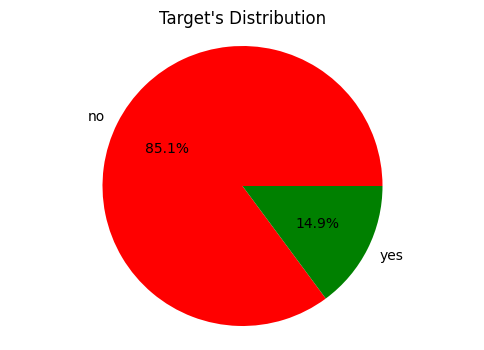

In [14]:
class_counts = train_df['target'].value_counts()

# Create pie chart
plt.figure(figsize=(6, 4))
plt.pie(class_counts.values, labels=class_counts.index,
        autopct='%1.1f%%',colors=['red', 'green'])
plt.title('Target\'s Distribution')
plt.axis('equal')
plt.show()

###  **Ananlysis from the Pie chart:-**
* Most of clients are less likely to subscribe.
* Approximately only 15% of the Clients are subscribing to a Term Deposit.
* **Dataset is highly Imbalanced.**

## **3.5 Data Visualization**

### **1. Histogram**

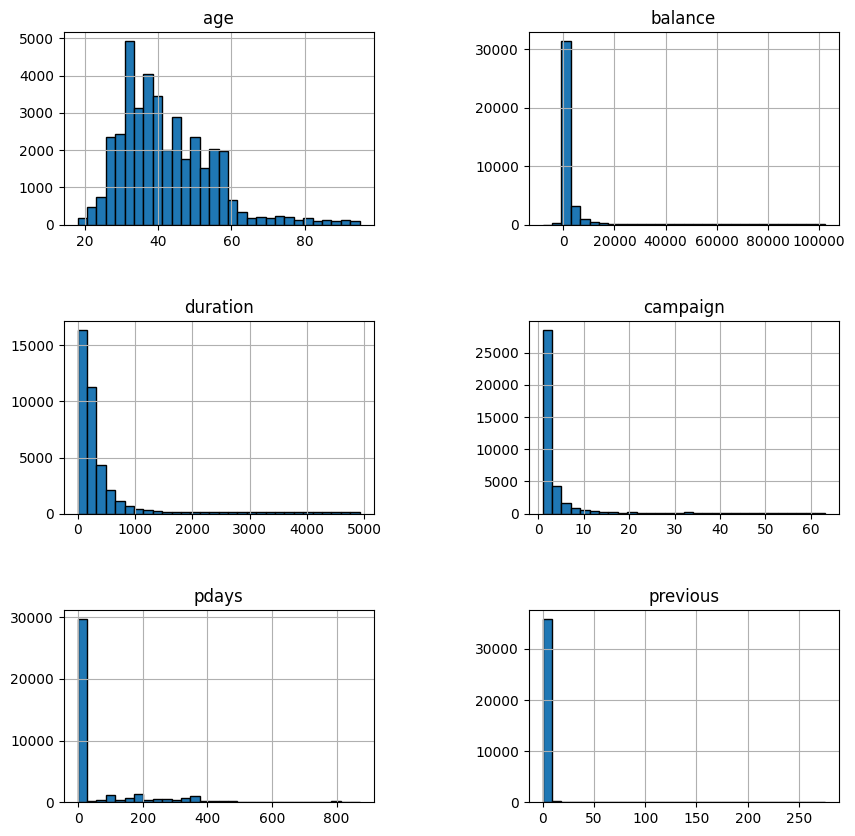

In [15]:
#Histogram for all the numerical columns:-
cols_to_plot=['age','balance','duration','campaign','pdays','previous']
train_df[cols_to_plot].hist(figsize=(10, 10), bins=30, edgecolor='black')
plt.subplots_adjust(hspace=0.5, wspace=0.5)

### **Analysis from the Histogram**
* The age histogram shows a peak around **30-40 years old**, indicating a concentration of **middle-aged** individuals.
* The balance chart shows a wide range of account balances, but with most of them being under 20,000 and a few outliers exceeding 80,000.
* The duration distribution also shows uneven distribution with many of them towards shorter time periods, with some very long durations.
* Campaign interactions are mostly clustered around lower values, with a few experiencing much higher participation.
* The pdays histogram shows a similar pattern, with most time intervals being relatively short between events.
* The previous histogram shows that the majority didn't had few prior engagements and a small number having significantly more.

### **2. Skewness for Numerical Columns**

In [16]:
cols_to_calculate = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
#train_df[cols_to_calculate].skew()

### **Analysis from the Skewness**
* **Age:-**
  * Positively skewed with the skewness of `1.124278`.
  * It means there are more young individuals with fewer older peoples.
* **Balance:-**
  * Highly positive skewed with the skewness of `4.063587`.
  * This implies that most accounts have low balances, with a few accounts having significantly high balances.
* **Duration:-**
  * Highly positive skewed with the skewness of `3.700585`.
  * This indicates that most interactions or events are short, with some exceptionally long durations.
* **Campaign:-**
  * Highly positive skewed with the skewness of `3.839593`.
  * This indicates that most campaign interactions are limited, with a few extensive campaign engagements.
* **Pdays:-**
  * Moderately positive skewed with skewness of `2.611773`.
  * This implies that most time intervals between events are short, with some longer periods.
* **Previous:-**
  * Highly positive skewed with the skewness of `4.206573`.
  * This indicates that most entities have few previous interactions, with a few having many prior engagements

### **3. Charts for Categorical Columns**

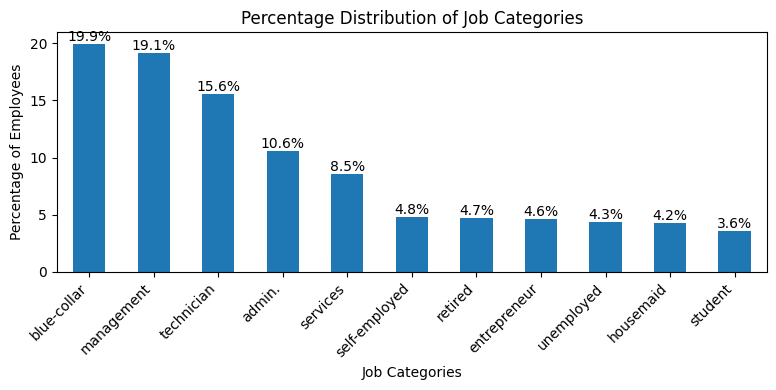

In [17]:
job_percentages = train_df['job'].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 4))
job_percentages.plot(kind='bar')
plt.title('Percentage Distribution of Job Categories')
plt.xlabel('Job Categories')
plt.ylabel('Percentage of Employees')
plt.xticks(rotation=45, ha='right')
for i, v in enumerate(job_percentages):
    plt.text(i, v, f'{v:.1f}%', ha='center', va='bottom')
plt.tight_layout()
plt.show()


<Figure size 640x480 with 0 Axes>

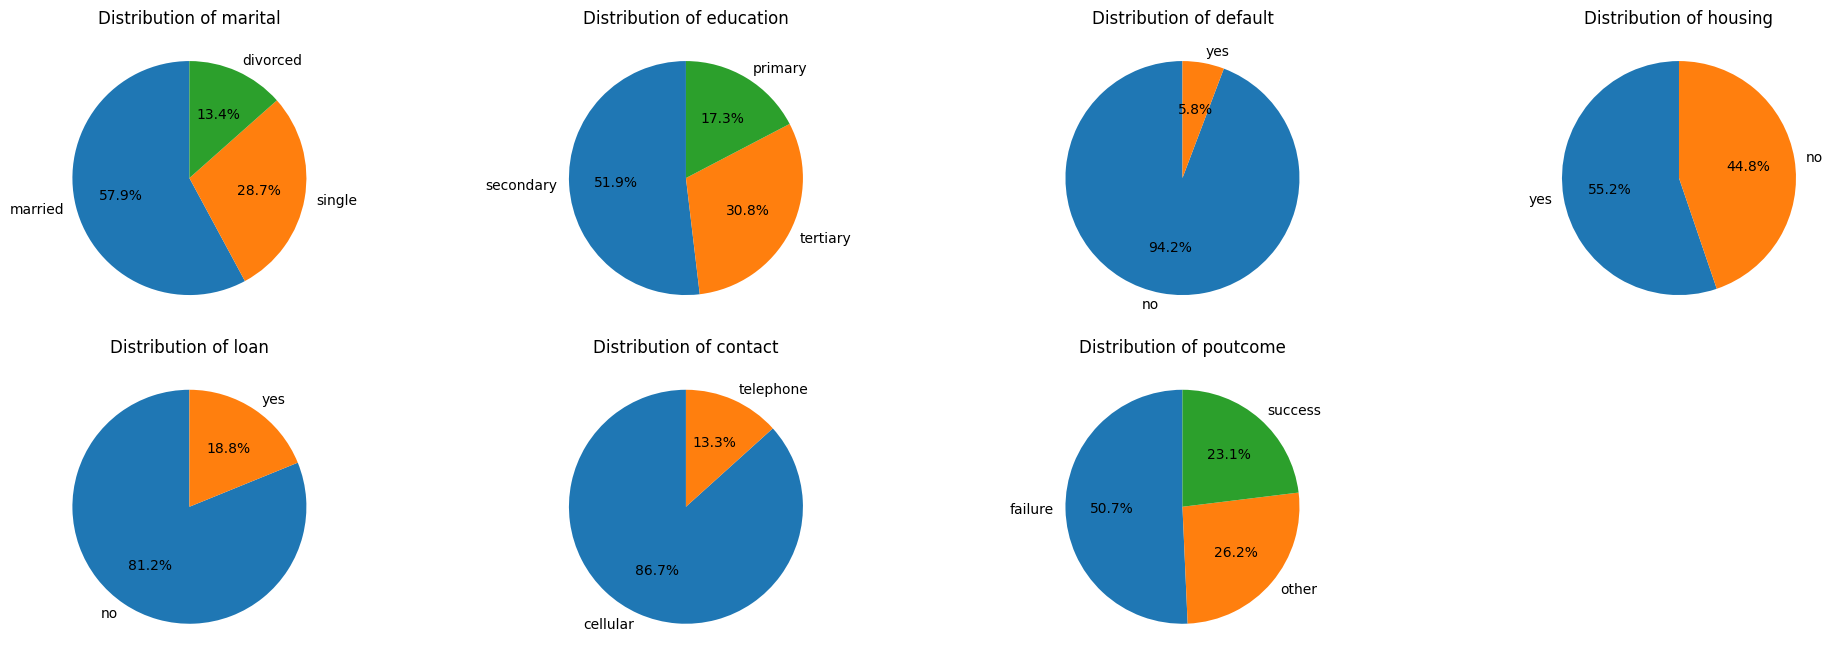

In [18]:
def create_feature_pie_charts(df):
    # List of features to create pie charts for
    features = ['marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']
    
    # Clear any existing plots
    plt.clf()
    
    # Create a figure with subplots
    fig = plt.figure(figsize=(20, 10))
    
    # Create pie chart for each feature
    for idx, feature in enumerate(features, 1):
        plt.subplot(3, 4, idx)
        value_counts = df[feature].value_counts()
        
        # Create pie chart
        plt.pie(value_counts.values, 
                labels=value_counts.index,
                autopct='%1.1f%%',
                startangle=90)
        
        plt.title(f'Distribution of {feature}')
    
    # Adjust layout to prevent overlap
    plt.tight_layout(pad=1.0)
    
    # Return the figure
    return fig
fig = create_feature_pie_charts(train_df)
plt.show()

### **Analysis from the Pie-Chart**
* **Job Distribution:** The largest segment is "blue-collar" at 19.9%, followed by "management" at 19.1% and "technician" at 15.6%.
* **Marital Distribution:** The largest segment is "married" at 57.9%, followed by "single" at 28.7%, and "divorced" at 13.4%.
* **Education Distribution:** The largest segment is "secondary" at 51.9%, followed by "tertiary" at 30.8% and "primary" at 17.3%.
* **Default Distribution:** The largest segment is "no" at 94.2%, indicating that the majority have not defaulted. The smaller segment is "yes" at 5.8%
* **Housing Distribution:** The largest segment is "no" at 55.2%, followed by "yes" at 44.8%.
* **Loan Distribution:** The largest segment is "yes" at 81.2%, followed by "no" at 18.8%.
* **Contact Distribution:** The largest segment is "cellular" at 86.7%, followed by "telephone" at 13.3%.
* **Poutcome Distribution:** The largest segment is "failure" at 50.7%, followed by "success" at 23.1%, and "other" at 26.2%.

### **Label Encoding for Categorical Columns:**

In [19]:
le_train_df=train_df.copy()

In [20]:
le = LabelEncoder()
job = pd.Series(le.fit_transform(le_train_df['job']))
marital = pd.Series(le.fit_transform(le_train_df['marital']))
education = pd.Series(le.fit_transform(le_train_df['education']))
default = pd.Series(le.fit_transform(le_train_df['default']))
housing = pd.Series(le.fit_transform(le_train_df['housing']))
loan = pd.Series(le.fit_transform(le_train_df['loan']))
contact = pd.Series(le.fit_transform(le_train_df['contact']))
poutcome = pd.Series(le.fit_transform(le_train_df['poutcome']))
target = pd.Series(le.fit_transform(le_train_df['target']))

In [21]:
le_num=le_train_df.drop(['job','marital','education','default','housing','loan','contact','poutcome','target'],axis=1)
le_obj=pd.concat([job,marital,education,default,housing,loan,contact,poutcome,target],axis=1)
le_obj.columns= ['job','marital','education','default','housing','loan','contact','poutcome','target']
le_df=pd.concat([le_num,le_obj],axis=1)
cols_to_plot = ['age', 'job', 'marital', 'education', 'default',
       'balance', 'housing', 'loan', 'contact', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'target']

## **3.6 BoxPlot**

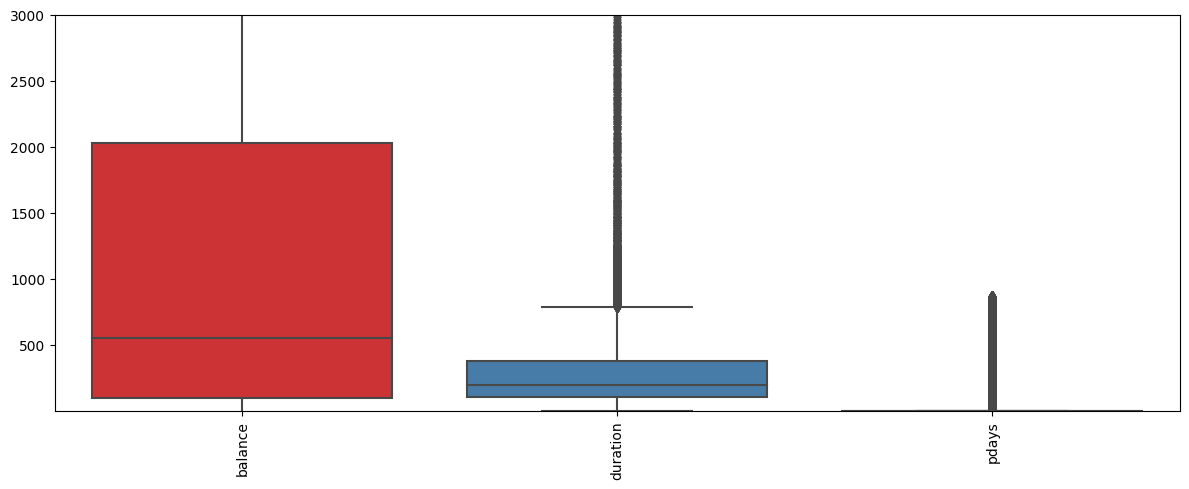

In [22]:
columns = ['balance', 'duration', 'pdays']
plt.figure(figsize=(12,5))
# ploting a box plot
sns.boxplot(data=le_df[columns],palette="Set1")
plt.xticks(rotation=90)
plt.ylim(3, 3000)
plt.tight_layout()
plt.show()

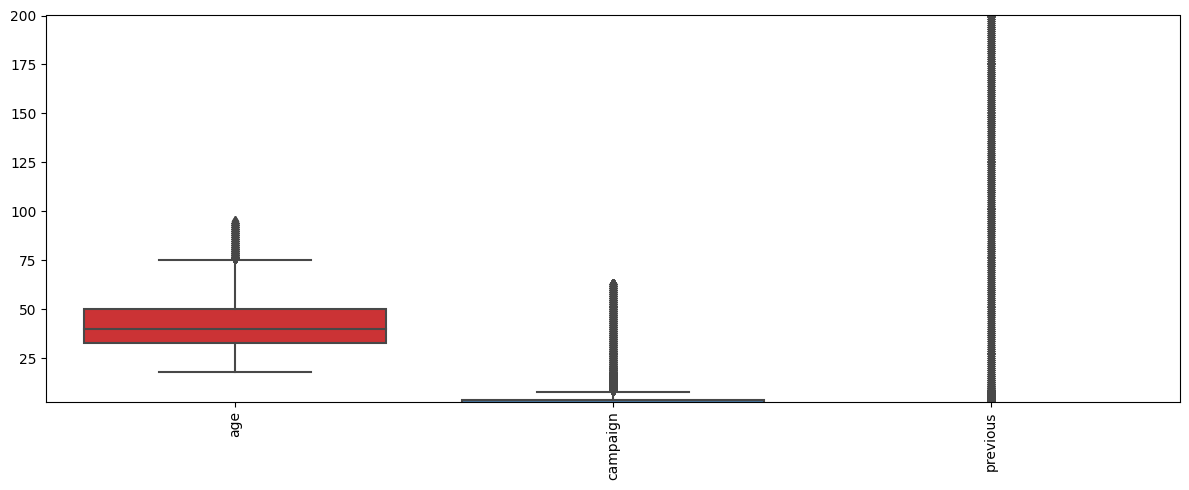

In [23]:
columns = ['age','campaign','previous']
plt.figure(figsize=(12,5))
# ploting a box plot
sns.boxplot(data=le_df[columns],palette="Set1")
plt.xticks(rotation=90)
plt.ylim(3, 200)
plt.tight_layout()
plt.show()

### **Analysis from the Box-Plot**
* The Age feature has few Outliers but, they might be useful for the model.
* Balance feature has lot of Outliers,It is also highly skewed toward the postive side.
* Duration feature also has a significant amount of Outliers but it is quite important to know the interest of the client.
* Campaign feature is also rightly skewed but has few Outliers too.
* Most of the Clients were not contacted previously so the Inter Quartile Range is not very clear and hence most of the data points are considered as Outliers in case of P-days,Previous.  

## **3.7 HeatMap of Correlation Matrix**

<Axes: >

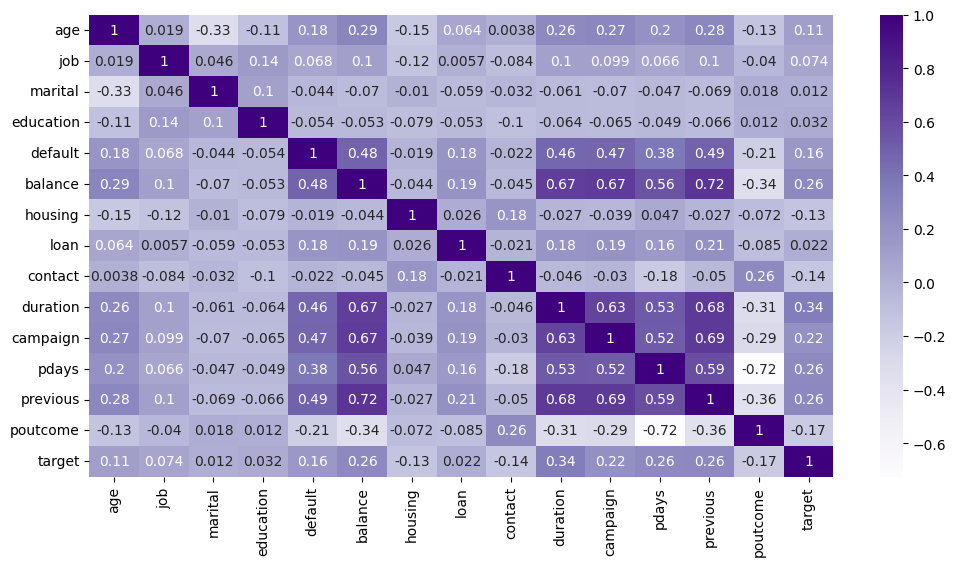

In [24]:
#correlation matrix
corr_matrix = le_df[cols_to_plot].corr()
plt.figure(figsize=(12,6))
sns.heatmap(corr_matrix, annot=True, cmap='Purples')

### **Analysis from the Heatmap**
* **Previous** and **Balance** feature has highest correlation of `0.72`.
  * This means that Clients with higher balance are more likely to engage with Bank.
  * The **Duration** and **Campaign** also has high significations with correlation of `0.68` and `0.69` respectively.
  * Hence we can say that clients with high balance are more likely to take part in Bank's Campaign.
* **Balance**,**Previous**,**Duration** and **Campaign** Columns plays a key role in the Sucess of the Bank's telemarking Campaign.
* **Duration** has the correlation of `0.34` with the **Target** variable which suggest that in most of the cases longer conversations are fruitful for the bank.

## **3.8 Exploratory Data Analysis Summary**

* **Data Distribution**: 
  The numerical features demonstrate **extreme variability in ranges**, which means it should be **scaled** before model training to prevent features with larger magnitudes disproportionately influencing the model's performance. 

* **Categorical Feature**: 
  **Categorical variables require encoding** to transform qualitative data into numerical format. With **limited unique categories**, **one-hot encoding** is an optimal strategy to preserve categorical information.

* **Missing Data**: 
  Several columns exhibit a lot of **missing values**, representing potential critical client information. Hence we need to impute those missing values using the **necessary stratergies** and gain maximum insight from them.

* **Class Imbalance in Target Variable**: 
  The dataset shows **significant class imbalance** in the target column, which can be challenging for model training.   Hence training models on the basis of the **class weights** can be a nice strategy to deal with this issue.

* **Numerical Feature Characteristics**: 
  **Pronounced skewness** and **extensive outlier presence** characterize the numerical features. Hence we to deal with them **statistical approach**, and also extract the maximum information from it.
 
* **Encoding Strategy**: 
  Given the **limited categorical feature diversity**, **one-hot encoding** is an efficient approach to:
  - Preserve categorical information
  - Avoid introducing ordinal relationships
  - Facilitate more fine model learning


# **04. Pre-Processing**

In [25]:
# This pipline uses simple imputer with strategy as mean for missing values and then use standard scaler for normalising them.
numerical_pipeline = make_pipeline(
    SimpleImputer(strategy='mean'),
    MinMaxScaler()
)

# This pipline uses simple imputer with strategy as most_frequent for missing values and then use onehotencoder for encoding.
categorical_pipeline = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(handle_unknown='ignore',sparse_output=False)
)

# This pipline uses simple imputer with strategy constant with value as 'MISSING' for missing values and then use onehotencoder for encoding.
Null_pipeline = make_pipeline(
    SimpleImputer(strategy='constant', fill_value='MISSING'),
    OneHotEncoder(handle_unknown='ignore',sparse_output=False)
)

### **Summary**
* **Numerical Pipeline:-**
   * First it will impute all the Null values with the mean of the Column.
   * Then it will scale all the values with Min Max scaler.
* **Categorical Pipeline:-**
   * First it will impute all the Null values with the most frequent category in the Column.
   * Then it will encode all of them Using One hot encoder.
* **Null Pipeline:-**
   * Poutcome Column has a lot of null Values hence First it will Impute those value with 'Missing'
   * Then perform One Hot encoding On Poutcome.

# **05. Feature Engineering**

## **5.1 Last Contact Date**

In [26]:
# extracting year month and date for last_contact_date for train data
train_df['last_contact_date_year'] = pd.to_datetime(train_df['last contact date']).dt.year
train_df['last_contact_date_month'] = pd.to_datetime(train_df['last contact date']).dt.month
train_df['last_contact_date_day'] = pd.to_datetime(train_df['last contact date']).dt.day

train_df['last_contact_date_year'] = train_df['last_contact_date_year'].astype('int64')
train_df['last_contact_date_month'] = train_df['last_contact_date_month'].astype('int64')
train_df['last_contact_date_day'] = train_df['last_contact_date_day'].astype('int64')

In [27]:
# extracting year month and date for last_contact_date for test data
test_df['last_contact_date_year'] = pd.to_datetime(test_df['last contact date']).dt.year
test_df['last_contact_date_month'] = pd.to_datetime(test_df['last contact date']).dt.month
test_df['last_contact_date_day'] = pd.to_datetime(test_df['last contact date']).dt.day

test_df['last_contact_date_year'] = test_df['last_contact_date_year'].astype('int64')
test_df['last_contact_date_month'] = test_df['last_contact_date_month'].astype('int64')
test_df['last_contact_date_day'] = test_df['last_contact_date_day'].astype('int64')

In [28]:
# Droping 'last contact date '
train_df = train_df.drop(['last contact date'],axis=1)
test_df = test_df.drop(['last contact date'],axis=1)

### **Report:-**
* Splitting the Last_contact_date column into last_contact_date_year, last_contact_date_month, last_contact_date_day.
* This helped preprocessing the column, and also take useful insights from it.

## **5.2 Age**

In [29]:
q1_train = train_df['age'].quantile(0.25)
q2_train = train_df['age'].median()
q3_train = train_df['age'].quantile(0.75)

In [30]:
# IQR = q1 - q3
# low = q1 - 1.5 * IQR
# high = q3 +  1.5 * IQR
# train_df = train_df[(train_df['age'] > low) & (train_df['age'] < high)]

### **Report:-**
* By removing the Outliers from the Age column, we are lossing important instances and hence the score is decreasing.

In [31]:
def category_age(age):
  if age<q1_train:
    return 0
  elif q1_train<=age<q2_train:
    return 1
  elif q2_train<=age<q3_train:
    return 2
  elif age>=q3_train:
    return 3
train_df['age']=train_df['age'].apply(category_age)

In [32]:
q1_test = test_df['age'].quantile(0.25)
q2_test = test_df['age'].median()
q3_test = test_df['age'].quantile(0.75)

In [33]:
def category_age(age):
  if age<q1_test:
    return 0
  elif q1_test<=age<q2_test:
    return 1
  elif q2_test<=age<q3_test:
    return 2
  elif age>=q3_test:
    return 3
test_df['age']=test_df['age'].apply(category_age)

### **Report:-**
* This helps in categorising the Age column in various bins according to there Quartile range.
* This also performs great on the test data.

## **5.3 Balance**

In [34]:
q1_train = train_df['balance'].quantile(0.25)
q2_train = train_df['balance'].median()
q3_train = train_df['balance'].quantile(0.75)

In [35]:
# IQR = q1 - q3
# low = q1 - 1.5 * IQR
# high = q3 +  1.5 * IQR
# train_df = train_df[(train_df['age'] > low) & (train_df['age'] < high)]

### **Report:-**
* By removing the Outliers from the Balance column, we are lossing important instances and hence the score is decreasing.

In [36]:
def category_balance(balance):
  if balance<q1_train:
    return 0
  elif q1_train<=balance<q2_train:
    return 1
  elif q2_train<=balance<q3_train:
    return 2
  elif balance>=q3_train:
    return 3
#train_df['balance']=train_df['balance'].apply(category_balance)

In [37]:
q1_test = test_df['balance'].quantile(0.25)
q2_test = test_df['balance'].median()
q3_test = test_df['balance'].quantile(0.75)

In [38]:
def category_balance(balance):
  if balance<q1_test:
    return 0
  elif q1_test<=balance<q2_test:
    return 1
  elif q2_test<=balance<q3_test:
    return 2
  elif balance>=q3_test:
    return 3
#test_df['balance']=test_df['balance'].apply(category_balance)

### **Report:-**
* By doing feature engineering on the Balance column we are lossing some important insights of the Balance column.
* The Overall score also decreases by doing this.

# **06. Model Building**

### **Data Splitting:-**

In [39]:
# splitting train_df into X and y.
X = train_df.drop(['target'],axis=1)
y = train_df['target']
y = (y == 'yes').astype(int) #converting to 1.0 or 0.0

In [40]:
# Splitting X and y into train and test set, with 20% as test set.
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [41]:
#To handle class Imbalance in the Dataset.
class_weights = compute_class_weight('balanced', classes=np.unique(y), y=y)

### **Column Transformation:-**

In [42]:
numerical_features = train_df.select_dtypes(include=['int64', 'float64']).columns.tolist()

categorical_features = ['job','contact','marital','default','housing','loan','education']

Null_features = ['poutcome']
#Because most of data points in the "poutcome" column is Null.

In [43]:
# Transforming the columns using preprocessing techniques
preprocessor = make_column_transformer(
    (numerical_pipeline,numerical_features),
    (categorical_pipeline,categorical_features),
    (Null_pipeline,Null_features),
    remainder='drop',
    n_jobs =-1
)

## **6.1 Random Forest Classifier**

In [44]:
estimator_1 = RandomForestClassifier(
    n_estimators=500,
    criterion='gini',
    max_depth=None,
    min_samples_split=15,
    min_samples_leaf=2,
    max_features='sqrt',
    class_weight={0: class_weights[0], 1: class_weights[1]},
    random_state=42,
    n_jobs=-1,
    verbose=1
)

In [45]:
#Preprocessing the data then estimating it, using pipeline.
model_pipeline_1 = make_pipeline(preprocessor,estimator_1) 

In [46]:
# Fitting the Model on 80% Training Data and predicting On 20% Test Data.
model_pipeline_1.fit(x_train,y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    7.5s finished


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['age', 'balance', 'duration',
                                                   'campaign', 'pdays',
                                                   'previous',
                                                   'last_contact_date_year',
                                                   'last_contact_date_month',
                                                   'last_contact_date_day']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simple...
                                                                   SimpleImputer(fill_value='MISSING',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['poutcome'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(class_weight={0: 0.5872723460340282,
                                                      1: 3.3645958469195127},
                                        min_samples_leaf=2,
                                        min_samples_split=15, n_estimators=500,
                                        n_jobs=-1, random_state=42,
                                        verbose=1))])

In [47]:
y_pred_1 = model_pipeline_1.predict(x_test)
f1_score_1 = f1_score(y_test, y_pred_1)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.3s finished


In [48]:
#F1 score on the Test Dataset
# print(f1_score_1)
# 0.6091193873999304

### **Cross-Validation:-**

In [49]:
#Cross Validation On the Training Dataset:-
# scores = cross_val_score(
#     estimator=model_pipeline_1, 
#     X=X, 
#     y=y, 
#     cv=5,  # 5-fold cross-validation
#     scoring='f1'  
# )

# Print individual fold scores
# print("Scores for each fold:", scores)

**Cross Validation Score:-**
```
Scores for each fold: [0.62634689 0.61452514 0.61470085 0.61694915 0.61875428]
```
* Seems to be a goodfit, since there is very low variation in the scores.

## **6.2 Desicion Tree Classifier**

In [50]:
estimator_2 = DecisionTreeClassifier(
    criterion='gini',
    max_depth=None,  
    min_samples_split=15, 
    min_samples_leaf=2,    
    class_weight={0: class_weights[0], 1: class_weights[1]},  
    random_state=42  
)

In [51]:
#Preprocessing the data then estimating it, using pipeline.
model_pipeline_2 = make_pipeline(preprocessor,estimator_2) 

In [52]:
# Fitting the Model on 80% Training Data and predicting On 20% Test Data.
model_pipeline_2.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['age', 'balance', 'duration',
                                                   'campaign', 'pdays',
                                                   'previous',
                                                   'last_contact_date_year',
                                                   'last_contact_date_month',
                                                   'last_contact_date_day']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simple...
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='MISSING',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['poutcome'])])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(class_weight={0: 0.5872723460340282,
                                                      1: 3.3645958469195127},
                                        min_samples_leaf=2,
                                        min_samples_split=15,
                                        random_state=42))])

In [53]:
y_pred_2 = model_pipeline_2.predict(x_test)
f1_score_2 = f1_score(y_test, y_pred_2)

In [54]:
#F1 score on the Test Dataset
# print(f1_score_2)
# 0.5403064623584277

### **Cross-Validation:-**

In [55]:
#Cross Validation On the Training Dataset:-
# scores = cross_val_score(
#     estimator=model_pipeline_2, 
#     X=X, 
#     y=y, 
#     cv=5,  # 5-fold cross-validation
#     scoring='f1'  
# )

#Print individual fold scores
#print("Scores for each fold:", scores)

**Cross Validation Score**
```
Scores for each fold: [0.53328873 0.52042161 0.52040483 0.50853018 0.52716298]
```
* Model is Overfiiting on the train dataset hence the variation is high, also the score on test Data is low.

## **6.3 AdaBoost Classifier**

In [56]:
estimator_3 = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(
        max_depth=3,
        random_state=42,
        class_weight={0: class_weights[0], 1: class_weights[1]}
    ),
    n_estimators=500,
    learning_rate=0.1,  
    random_state=42,
    algorithm='SAMME.R'
)

In [57]:
#Preprocessing the data then estimating it, using pipeline.
model_pipeline_3 = make_pipeline(preprocessor,estimator_3) 

In [58]:
# Fitting the Model on 80% Training Data and predicting On 20% Test Data.
model_pipeline_3.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['age', 'balance', 'duration',
                                                   'campaign', 'pdays',
                                                   'previous',
                                                   'last_contact_date_year',
                                                   'last_contact_date_month',
                                                   'last_contact_date_day']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simple...
                                                                   SimpleImputer(fill_value='MISSING',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['poutcome'])])),
                ('adaboostclassifier',
                 AdaBoostClassifier(estimator=DecisionTreeClassifier(class_weight={0: 0.5872723460340282,
                                                                                   1: 3.3645958469195127},
                                                                     max_depth=3,
                                                                     random_state=42),
                                    learning_rate=0.1, n_estimators=500,
                                    random_state=42))])

In [59]:
y_pred_3 = model_pipeline_3.predict(x_test)
f1_score_3 = f1_score(y_test, y_pred_3)

In [60]:
#F1 score on the Test Dataset
# print(f1_score_3)
# 0.5938588160810382

### **Cross-Validation:-**

In [61]:
#Cross Validation On the Training Dataset:-
# scores = cross_val_score(
#     estimator=model_pipeline_3, 
#     X=X, 
#     y=y, 
#     cv=5,  # 5-fold cross-validation
#     scoring='f1'  
# )

#Print individual fold scores
#print("Scores for each fold:", scores)

**Cross Validation Score:-**
```
Scores for each fold: [0.60625 0.59605911 0.59044684 0.59282371 0.60375038]
```
* Model is Slightly Underfitting on the train Dataset.

## **6.4 XGBoost Classifier**

In [62]:
def calculate_scale_pos_weight(y):
    
    class_counts = np.bincount(y)
    majority_class_count = np.max(class_counts)
    minority_class_count = np.min(class_counts)
    
    scale_pos_weight = majority_class_count / minority_class_count
    
    return scale_pos_weight
#it give the ratio of majority class to the minority class count.

In [63]:
estimator_4 = xgb.XGBClassifier(
    n_estimators=1000,
    learning_rate=0.01,
    max_depth=8,
    min_child_weight=20,
    gamma=1,
    subsample=0.8,
    colsample_bytree=0.7,
    reg_alpha=1,
    reg_lambda=0.1,
    random_state=42,
    n_jobs=-1,
    verbosity=1,
    scale_pos_weight=calculate_scale_pos_weight(y)
)

In [64]:
#Preprocessing the data then estimating it, using pipeline.
model_pipeline_4 = make_pipeline(preprocessor,estimator_4) 

In [65]:
# Fitting the Model on 80% Training Data and predicting On 20% Test Data.
model_pipeline_4.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['age', 'balance', 'duration',
                                                   'campaign', 'pdays',
                                                   'previous',
                                                   'last_contact_date_year',
                                                   'last_contact_date_month',
                                                   'last_contact_date_day']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simple...
                               feature_types=None, gamma=1, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.01,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=8, max_leaves=None,
                               min_child_weight=20, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=1000, n_jobs=-1,
                               num_parallel_tree=None, random_state=42, ...))])

In [66]:
y_pred_4 = model_pipeline_4.predict(x_test)
f1_score_4 = f1_score(y_test, y_pred_4)

In [67]:
#F1 score on the Test Dataset
# print(f1_score_4)
# 0.6235884567126725

### **Cross-Validation:-**

In [68]:
#Cross Validation On the Training Dataset:-
# scores = cross_val_score(
#     estimator=model_pipeline_4, 
#     X=X, 
#     y=y, 
#     cv=5,  # 5-fold cross-validation
#     scoring='f1'  
# )

# Print individual fold scores
# print("Scores for each fold:", scores)

**Cross Validation Score:-**
```
Scores for each fold: [0.6369029  0.62056304 0.62407862 0.61373391 0.62283105]

```
* Seems to be a goodfit, since there is low variation in the scores.

## **6.5 Conclusion**

### **6.5.1 Classification Report**

### **1. Random Forest Classifier**

In [69]:
# report = classification_report(y_test, y_pred_1)
# print(report)

**Clasification Report of Random Forest Classifier**
```
              precision    recall  f1-score   support

           0       0.96      0.87      0.91      6713
           1       0.51      0.78      0.62      1130

    accuracy                           0.86      7843
   macro avg       0.73      0.83      0.76      7843
weighted avg       0.89      0.86      0.87      7843
```

### **2. Decision Tree Classifier**

In [70]:
# report = classification_report(y_test, y_pred_2)
# print(report)

**Clasification Report of Decision Tree Classifier**

```
              precision    recall  f1-score   support

           0       0.95      0.84      0.89      6713
           1       0.43      0.72      0.54      1130

    accuracy                           0.82      7843
   macro avg       0.69      0.78      0.72      7843
weighted avg       0.87      0.82      0.84      7843

```

### **3. AdaBoost Classifier**

In [71]:
 # report = classification_report(y_test, y_pred_3)
 # print(report)

**Clasification Report of Adaboost Classifier**
```
              precision    recall  f1-score   support

           0       0.97      0.84      0.90      6713
           1       0.46      0.83      0.59      1130

    accuracy                           0.84      7843
   macro avg       0.71      0.83      0.75      7843
weighted avg       0.89      0.84      0.85      7843
```

### **4. XGBoost Classifier**

In [72]:
# report = classification_report(y_test, y_pred_4)
# print(report)

**Clasification Report of Xg-Boost**
```
              precision    recall  f1-score   support

           0       0.98      0.84      0.90      6713
           1       0.48      0.88      0.62      1130

    accuracy                           0.85      7843
   macro avg       0.73      0.86      0.76      7843
weighted avg       0.91      0.85      0.86      7843
```

### **6.5.2 Confusion Matrix**

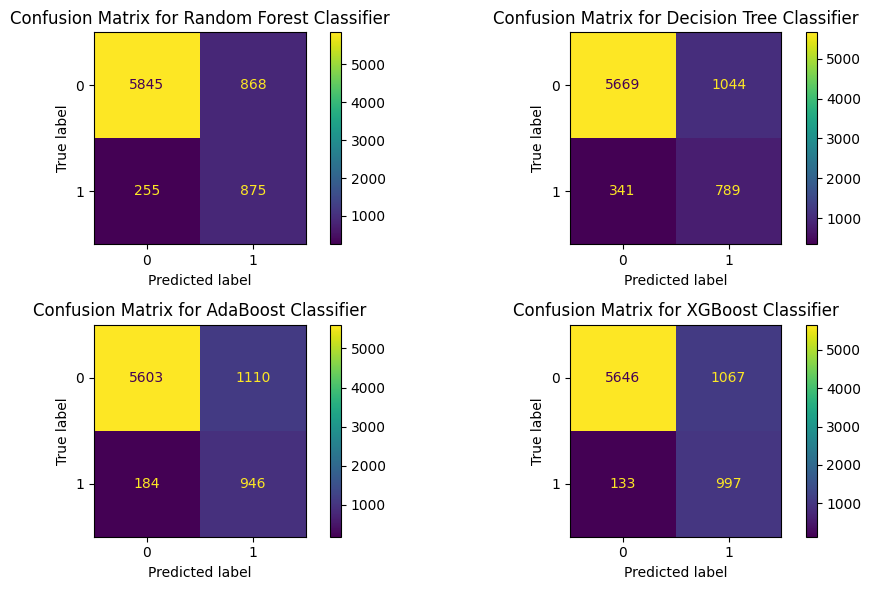

In [73]:
fig, axes = plt.subplots(2, 2, figsize=(10, 6))

# Random Forest Classifier
cm = confusion_matrix(y_test, y_pred_1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax=axes[0, 0])
axes[0, 0].set_title('Confusion Matrix for Random Forest Classifier')

# Decision Tree Classifier
cm = confusion_matrix(y_test, y_pred_2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax=axes[0, 1])
axes[0, 1].set_title('Confusion Matrix for Decision Tree Classifier')

# AdaBoost Classifier
cm = confusion_matrix(y_test, y_pred_3)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax=axes[1, 0])
axes[1, 0].set_title('Confusion Matrix for AdaBoost Classifier')

# XGBoost Classifier
cm = confusion_matrix(y_test, y_pred_4)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax=axes[1, 1])
axes[1, 1].set_title('Confusion Matrix for XGBoost Classifier')

plt.tight_layout()
plt.show()

### **6.5.3 Precision-Recall Curve**

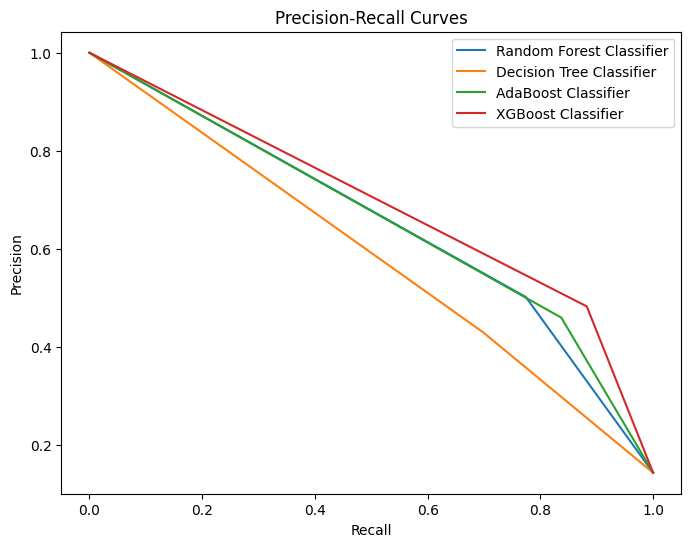

In [74]:
plt.figure(figsize=(8, 6))

# Random Forest Classifier precision-recall curve
precision_1, recall_1, _ = precision_recall_curve(y_test, y_pred_1)
plt.plot(recall_1, precision_1, label='Random Forest Classifier')

# Decision Tree Classifier precision-recall curve
precision_2, recall_2, _ = precision_recall_curve(y_test, y_pred_2)
plt.plot(recall_2, precision_2, label='Decision Tree Classifier') 

# AdaBoost Classifier precision-recall curve
precision_3, recall_3, _ = precision_recall_curve(y_test, y_pred_3)
plt.plot(recall_3, precision_3, label='AdaBoost Classifier')

# XGBoost Classifier precision-recall curve
precision_4, recall_4, _ = precision_recall_curve(y_test, y_pred_4)
plt.plot(recall_4, precision_4, label='XGBoost Classifier')

plt.title('Precision-Recall Curves')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()


### **Analysis from the Precision-Recall Curve:-**

1. The Random Forest classifier has the highest precision at low recall levels, indicating it makes the most accurate positive predictions when only a small fraction of positive instances are identified.

2. The XGBoost classifier has the highest recall at low precision levels, meaning it is able to identify the largest fraction of positive instances but with more false positive predictions.

3. The Decision Tree and AdaBoost classifiers fall between the other two in terms of the precision-recall trade-off

# **07. Hyperparameter Tuning**

In [75]:
scoring = make_scorer(f1_score, average ='macro')

cv=5

param_dist_1 = {
    'randomforestclassifier__n_estimators': [300, 500, 700, 1000],
    'randomforestclassifier__max_depth': [10, 15, 20, 25, None],
    'randomforestclassifier__min_samples_split': [2, 5, 10, 15],
    'randomforestclassifier__min_samples_leaf': [1, 2, 4],
    'randomforestclassifier__max_features': ['sqrt', 'log2'],
    'randomforestclassifier__criterion': ['entropy', 'gini']
}
param_dist_2 = {
    'xgbclassifier__n_estimators': [300, 500, 700, 1000],
    'xgbclassifier__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'xgbclassifier__max_depth': [4, 6, 8, 10],
    'xgbclassifier__min_child_weight': [5, 10, 20, 30],
    'xgbclassifier__gamma': [0, 0.1, 0.5, 1],
    'xgbclassifier__subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'xgbclassifier__colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'xgbclassifier__reg_alpha': [0, 0.1, 0.5, 1],
    'xgbclassifier__reg_lambda': [0, 0.1, 0.5, 1]
}


In [76]:
random_search = RandomizedSearchCV(
          estimator= model_pipeline_1,
          param_distributions=param_dist_2,
          n_iter=10, 
          scoring=scoring,
          refit='f1',  
          cv=cv,
          n_jobs=-1,  
          verbose=2,
          random_state=42
    )

In [77]:
# random_search.fit(X, y)

In [78]:
# Print best parameters and score
# print("Best Parameters:", random_search.best_params_)
# print("Best Score:", random_search.best_score_)

### **Best Parameters for XGBoost Classifier**
```
Best Parameters: {'xgbclassifier__subsample': 0.8,
                  'xgbclassifier__reg_lambda': 0.1,
                  'xgbclassifier__reg_alpha': 1,
                  'xgbclassifier__n_estimators': 1000,
                  'xgbclassifier__min_child_weight': 20,
                  'xgbclassifier__max_depth': 8,
                  'xgbclassifier__learning_rate': 0.01,
                  'xgbclassifier__gamma': 1,
                  'xgbclassifier__colsample_bytree': 0.7}

Best Score: 0.7640077944496493
```

### **Best Parameters for Random Forest Classifier**
```
Best Parameters: {'randomforestclassifier__n_estimators': 500,
                  'randomforestclassifier__min_samples_split': 15,
                  'randomforestclassifier__min_samples_leaf': 2,
                  'randomforestclassifier__max_features': 'sqrt',
                  'randomforestclassifier__max_depth': None,
                  'randomforestclassifier__criterion': 'gini'}

Best Score: 0.7691308173105424
```

# **08. Submission**

## **8.1 Random Forest Classifier**

In [79]:
model_pipeline_1.fit(X,y)
test_predictions = model_pipeline_1.predict(test_df)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    9.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.5s finished


*  **F1_Score = 0.76**

## **8.2 Decision Tree Classifier**

In [80]:
#model_pipeline_2.fit(X,y)
#test_predictions = model_pipeline_2.predict(test_df)

*  **F1_Score = 0.71**

## **8.3 AdaBoost Classifier**

In [81]:
#model_pipeline_3.fit(X,y)
#test_predictions = model_pipeline_3.predict(test_df)

*  **F1_Score = 0.75**

## **8.4 XGBoost Classifier**

In [82]:
#model_pipeline_4.fit(X,y)
#test_predictions = model_pipeline_4.predict(test_df)

*  **F1_Score = 0.77**

## **8.5 Conversion of Target Values**

In [83]:
def conv_data(arr):
    result = np.where(arr == 1, 'yes', np.where(arr == 0, 'no', arr))
    return result

## **8.6 Final Submission**

In [84]:
submission_df=pd.DataFrame({
    'id': range(len(test_predictions)),
    'target': conv_data(test_predictions)
})

In [85]:
submission_df

,id,target
0,0,no
1,1,no
2,2,no
3,3,no
4,4,yes
...,...,...
9995,9995,no
9996,9996,yes
9997,9997,yes
9998,9998,yes


In [86]:
submission_df.to_csv('submission.csv',index=False)